In [1]:
pip install strsimpy

Note: you may need to restart the kernel to use updated packages.


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-цен" data-toc-modified-id="Анализ-цен-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Анализ цен</a></span></li><li><span><a href="#Описание-датасетов" data-toc-modified-id="Описание-датасетов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание датасетов</a></span></li><li><span><a href="#Презентация" data-toc-modified-id="Презентация-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Презентация</a></span></li><li><span><a href="#Dashbaord" data-toc-modified-id="Dashbaord-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dashbaord</a></span><ul class="toc-item"><li><span><a href="#Загрузить-данные-и-подготовить-их-к-анализу" data-toc-modified-id="Загрузить-данные-и-подготовить-их-к-анализу-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Загрузить данные и подготовить их к анализу</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>EDA</a></span></li></ul></div>

# Анализ цен

Анализ цен на мужские духи в таких магазинах, как Золотое яблоко, Рив Гош, Летуаль.

# Описание датасетов
*	`name` — имя товара,
*	`brand` — бренд,
*	`volume` — объем,
*	`price` — цена без скидки,
*	`best_loyalty_price` — цена с учетом скидки,
*	`shop` — магазин,


# Презентация
https://github.com/AlexVachkan/Present/blob/main/metanprom.pdf

# Dashbaord
https://github.com/AlexVachkan/Present/blob/main/metanprom_dasboard.md

## Загрузить данные и подготовить их к анализу

Импортируем библиотеки

In [2]:
import pandas as pd
import numpy as np

import os

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st

from statsmodels.stats.proportion import proportions_ztest

from strsimpy.levenshtein import Levenshtein

# from pandas_profiling import ProfileReport


Загружаем датасет:

In [3]:
# Прописываем пути
pth1 = 'C:\\Users\\a.vechkanov\\Desktop\\Госты, Литература\\Остальное\\Data analitics\\Тестовые\\Золотое яблоко\\'
pth2 = 'C:\\Users\\Александр\\OneDrive\\Рабочий стол\\Python\\ЯндексПрактикум\\Тестовые\\Золотое яблоко\\'
# pth3 = '/datasets/'

# конструция для загрузки файлов if elif
if os.path.exists(pth1):
    ap_df = pd.read_csv(pth1+'prices_gold_apple.csv', sep=',')
    rg_df = pd.read_csv(pth1+'prices_riv_gosh.csv', sep=',')
    #le_df = pd.read_csv(pth1+'prices_letual.csv', sep=',')
    
elif os.path.exists(pth2):
    ap_df = pd.read_csv(pth1+'prices_gold_apple.csv', sep=',')
    rg_df = pd.read_csv(pth1+'prices_riv_gosh.csv', sep=',')
    #le_df = pd.read_csv(pth1+'prices_letual.csv', sep=',')
    
# elif os.path.exists(pth3):
#     df = pd.read_csv(pth3+'bank_dataset.csv', sep=',')
            
else:
    print('Увы и ах, но нет файлов')

Склеиваем таблицы в один датафрей для более удобной работы 

In [4]:
data = pd.concat(
            [ap_df, rg_df], # , le_df - удалил для проверки гипотезы 
            axis=0
                    ).drop(
            columns='Unnamed: 0',
            axis=0
                    ).reset_index(drop=True) 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4444 entries, 0 to 4443
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4444 non-null   object 
 1   name                4444 non-null   object 
 2   brand               4434 non-null   object 
 3   volume              4444 non-null   object 
 4   price               4444 non-null   float64
 5   best_loyalty_price  4444 non-null   object 
 6   shop                4444 non-null   object 
dtypes: float64(1), object(6)
memory usage: 243.2+ KB


Создадим список таблицы

In [5]:
tables = [data]

Напишем функцию для вывода информации по нашим таблицам

In [6]:
def info(tables):
    '''
    Функция выводит необходимую информацию для первичного изучения данных.
    
    На вход принимает список с датайрефмами (tables=[df1,df2,...,dfn]).
    '''
    for table in tables:
        display(table.head(3))
        print('-------------------------------------------------------------------\n')
        print(table.info())            
        print('-------------------------------------------------------------------\n')
        print(table.describe())
        print('\n$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$\n')

Посмотрим наши данные в таблицах

In [7]:
info(tables)

,id,name,brand,volume,price,best_loyalty_price,shop
0,185723,Soleil de Capri,MONTALE,20,3000.0,2400,Золотое яблоко
1,232909,Meditation box,Home Owner,нет объема,4690.0,4221,Золотое яблоко
2,85653,Bal d'Afrique,Byredo,нет объема,16790.0,14271,Золотое яблоко


-------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4444 entries, 0 to 4443
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4444 non-null   object 
 1   name                4444 non-null   object 
 2   brand               4434 non-null   object 
 3   volume              4444 non-null   object 
 4   price               4444 non-null   float64
 5   best_loyalty_price  4444 non-null   object 
 6   shop                4444 non-null   object 
dtypes: float64(1), object(6)
memory usage: 243.2+ KB
None
-------------------------------------------------------------------

              price
count   4444.000000
mean    9749.421242
std     9537.841026
min      131.000000
25%     2735.250000
50%     7500.000000
75%    11100.000000
max    58010.000000

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$



**Вывод**    

    info()
    
    1) Пропусков нет
    2) Тип данных столбца best_loyalty_price необходимо поменять на float
    
    describe()
    
    1) Стандартное почти равно медиане
    2) Видим большую разницу между min и max  

# Подготовка данных

Приведём все столбцы к единому регистру 

In [8]:
for i in data.columns:
    if i == 'id':
        continue
    try:
        data[i] = data[i].str.lower()
    except:
        continue

У нас очень много дубликатов, поработаем с этим:

In [9]:
data.query('brand=="gucci"').head()

,id,name,brand,volume,price,best_loyalty_price,shop
90,119868,guilty pour homme,gucci,50,4200.0,нет скидки,золотое яблоко
122,143704,pour homme,gucci,нет объема,7811.0,нет скидки,золотое яблоко
156,110963,guilty cologne,gucci,90,5971.0,нет скидки,золотое яблоко
179,142116,guilty pour homme,gucci,90,8470.0,нет скидки,золотое яблоко
234,151402,guilty pour homme black,gucci,90,6405.0,нет скидки,золотое яблоко


Уберем явные дубликаты 

In [10]:
data[data.duplicated() == True]

,id,name,brand,volume,price,best_loyalty_price,shop
20,185723,soleil de capri,montale,20,3000.0,2400,золотое яблоко
21,232909,meditation box,home owner,нет объема,4690.0,4221,золотое яблоко
22,85653,bal d'afrique,byredo,нет объема,16790.0,14271,золотое яблоко
23,111568,stronger with you intensely,giorgio armani,50,4449.0,нет скидки,золотое яблоко
24,113641,molecule 02,escentric molecules,30,7530.0,6400,золотое яблоко
...,...,...,...,...,...,...,...
4439,base_987973,l'eau kenzo pour homme eau de toilette,kenzo,100,4820.0,NaN,рив гош
4440,985594,tiziana terenzi kristina 2022 parfum,tiziana terenzi,мужчин и женщин,33150.0,NaN,рив гош
4441,base_987536,giorgio armani stronger with you only eau de t...,giorgio armani,100,7995.0,NaN,рив гош
4442,base_988276,giorgio armani acqua di gio eau de parfum,giorgio armani,125,9360.0,NaN,рив гош


In [11]:
data.duplicated().sum()

2420

In [12]:
data = data.drop_duplicates()
data.head()

,id,name,brand,volume,price,best_loyalty_price,shop
0,185723,soleil de capri,montale,20,3000.0,2400,золотое яблоко
1,232909,meditation box,home owner,нет объема,4690.0,4221,золотое яблоко
2,85653,bal d'afrique,byredo,нет объема,16790.0,14271,золотое яблоко
3,111568,stronger with you intensely,giorgio armani,50,4449.0,нет скидки,золотое яблоко
4,113641,molecule 02,escentric molecules,30,7530.0,6400,золотое яблоко


In [13]:
data[data.duplicated() == True]

,id,name,brand,volume,price,best_loyalty_price,shop


Далее поработаем с неявными дубликатами

In [14]:
data.query('brand=="gucci"').head(30)

,id,name,brand,volume,price,best_loyalty_price,shop
90,119868,guilty pour homme,gucci,50,4200.0,нет скидки,золотое яблоко
122,143704,pour homme,gucci,нет объема,7811.0,нет скидки,золотое яблоко
156,110963,guilty cologne,gucci,90,5971.0,нет скидки,золотое яблоко
179,142116,guilty pour homme,gucci,90,8470.0,нет скидки,золотое яблоко
234,151402,guilty pour homme black,gucci,90,6405.0,нет скидки,золотое яблоко
471,119276,mémoire d'une odeur,gucci,нет объема,6755.0,нет скидки,золотое яблоко
1147,163605,the alchemist's garden a song for the rose eau...,gucci,100,37780.0,32113,золотое яблоко
1148,163607,the alchemist's garden winter's spring eau de...,gucci,100,37780.0,32113,золотое яблоко
1149,163609,the alchemist's garden the last day of summer ...,gucci,100,37780.0,32113,золотое яблоко
1150,163610,the alchemist's garden tears of iris eau de pa...,gucci,100,37780.0,32113,золотое яблоко


In [15]:
levenshtein = Levenshtein()
print(levenshtein.distance('Gucci Guilty Pour Homme', 'Gucci Guilty Pour Homme Eau de Parfume'))
print(levenshtein.distance('Gucci Guilty Pour Homme Eau de Parfume', 'Gucci Guilty Pour Hommе Eau de Toilette'))
print(levenshtein.distance('Gucci Guilty Pour Homme', 'Gucci Guilty Pour Hommе Eau de Toilette'))

15
8
16


In [24]:
data_test = data.query('brand=="gucci"').head(30)
data_test

,id,name,brand,volume,price,best_loyalty_price,shop
90,119868,guilty pour homme,gucci,50,4200.0,нет скидки,золотое яблоко
122,143704,pour homme,gucci,нет объема,7811.0,нет скидки,золотое яблоко
156,110963,guilty cologne,gucci,90,5971.0,нет скидки,золотое яблоко
179,142116,guilty pour homme,gucci,90,8470.0,нет скидки,золотое яблоко
234,151402,guilty pour homme black,gucci,90,6405.0,нет скидки,золотое яблоко
471,119276,mémoire d'une odeur,gucci,нет объема,6755.0,нет скидки,золотое яблоко
1147,163605,the alchemist's garden a song for the rose eau...,gucci,100,37780.0,32113,золотое яблоко
1148,163607,the alchemist's garden winter's spring eau de...,gucci,100,37780.0,32113,золотое яблоко
1149,163609,the alchemist's garden the last day of summer ...,gucci,100,37780.0,32113,золотое яблоко
1150,163610,the alchemist's garden tears of iris eau de pa...,gucci,100,37780.0,32113,золотое яблоко


In [65]:
def srav(row):
    text_1 = row.query('shop=="золотое яблоко"')['name']
    text_2 = row.query('shop=="рив гош"')['name']
    
    if levenshtein.distance(text_1, text_2) < 15:
        return text_1

data_test.apply(srav)

AttributeError: 'Series' object has no attribute 'query'

In [56]:
for i in range(len(data_test.index)):
    print(data_test.query('shop=="золотое яблоко"').iloc[i]['name'])
    
    
    
    

guilty pour homme
pour homme
guilty cologne
guilty pour homme
guilty pour homme black
mémoire d'une odeur 
the alchemist's garden a song for the rose eau de parfum
the alchemist's garden winter's spring  eau de parfum
the alchemist's garden the last day of summer eau de parfum
the alchemist's garden tears of iris eau de parfum
the alchemist's garden fading autumn acqua profumata
the alchemist's garden  a winter melody acqua profumata
the alchemist's garden a chant for the nymph eau de parfum
the alchemist's garden a midnight stroll eau de parfum
alchemist's garden a gloaming night


IndexError: single positional indexer is out-of-bounds

# EDA

Самые дорогие бренды 

In [17]:
top_brand = data.pivot_table(
            index='brand', aggfunc=['mean', 'median', 'count']).drop(
            columns=[('count','name'),('count','price'),('count','shop'),('count','volume'),('count','best_loyalty_price')], axis=1).sort_values(
            by=[('mean', 'price')], ascending=False).reset_index().head(10)
top_brand

,brand,mean,median,count
,,price,price,id
0,initio parfums prives,42180.000000,41110.0,11
1,roja dove,41848.333333,42190.0,6
2,ex nihilo,41016.125000,43600.0,16
3,amouage,37223.333333,40010.0,6
4,shaik,34366.666667,31170.0,3
5,tiziana terenzi,33150.000000,33150.0,1
6,hfc,32574.285714,35900.0,7
7,parfums de marly,30449.812500,33530.0,16
8,dr. vranjes firenze,28856.279070,29400.0,43


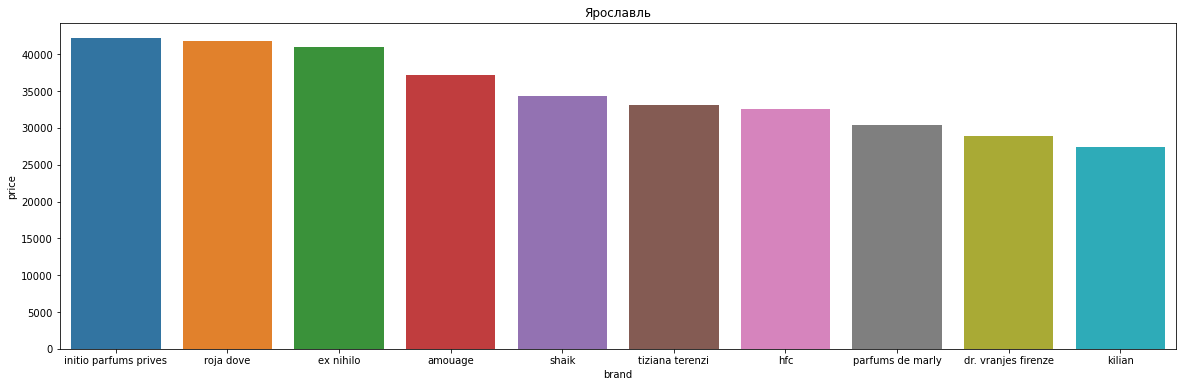

In [18]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(1,1,1)

sns.barplot( 
            data = top_brand,
            y=('mean', 'price'),
            x='brand',
            ax=ax1
            )
            
ax1.set_title('Ярославль')
plt.xticks(rotation=0)
plt.ylabel('price')
plt.show()

Самые дорогие бернды с делением по магазинам и с общими продуктами, потому что ассортимент отличется в своей массе 

In [19]:
top_brand_shop = data.pivot_table(
                index='brand', columns='shop', aggfunc='mean').reset_index().dropna()
top_brand_shop

brand          price         
shop                   золотое яблоко  рив гош
28    carolina herrera    7101.250000   8120.0
41                dior   10129.411765  13700.0
58      giorgio armani   16371.250000   8677.5
61               gucci   23579.466667  24120.0
68           hugo boss    7560.000000   6800.0
77               kenzo    4165.500000   4820.0
86             lacoste    7441.818182   7995.0

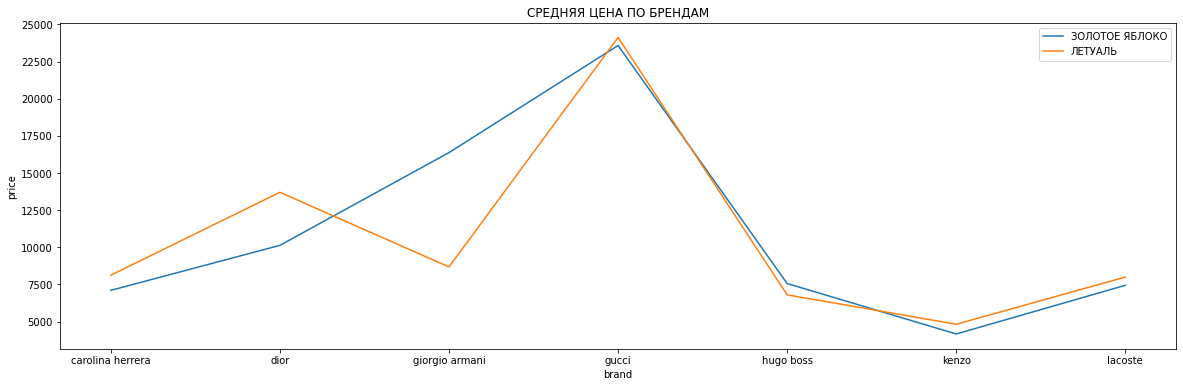

In [20]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(1,1,1)

sns.lineplot( 
            data = top_brand_shop,
            y=('price', 'золотое яблоко'),
            x='brand',
            legend='full',
            ax=ax1          
            )

# sns.lineplot( 
#             data = top_brand_shop,
#             y=('price', 'летуаль'),
#             x='brand',
#             ax=ax1
#             )

sns.lineplot( 
            data = top_brand_shop,
            y=('price', 'рив гош'),
            x='brand',
            ax=ax1
            )
            
ax1.set_title('СРЕДНЯЯ ЦЕНА ПО БРЕНДАМ')
plt.xticks(rotation=0)
plt.ylabel('price')
ax1.legend(['ЗОЛОТОЕ ЯБЛОКО', 'ЛЕТУАЛЬ', 'РИВ ГОШ'])
plt.show()

Как видим бренды дешевли всего в Летуали, но опять таки, зависит от какие именно товары топовых брендов продаются в магазине

Рассмотрим срез по наименованию товара

In [21]:
top_name_shop = data.pivot_table(
                index=['brand', 'name'], columns='shop', aggfunc='mean').reset_index()#.dropna()

top_name_shop.columns = top_name_shop.columns.map(''.join)

top_name_shop

# top_name_shop.dropna()
top_name_shop.query('brand =="dior"')
# data.query('brand=="gucci"').head(50)

,brand,name,priceзолотое яблоко,priceрив гош
367,dior,dior homme,9850.0,NaN
368,dior,dior homme cologne,11250.0,NaN
369,dior,dior homme intense,10800.0,NaN
370,dior,dior sauvage elixir parfum,NaN,13700.0
371,dior,eau sauvage,10325.0,NaN
372,dior,eau sauvage cologne,9850.0,NaN
373,dior,eau sauvage extreme,10800.0,NaN
374,dior,fahrenheit,7050.0,NaN
375,dior,higher,9850.0,NaN
376,dior,higher energy,9850.0,NaN


In [22]:
data

,id,name,brand,volume,price,best_loyalty_price,shop
0,185723,soleil de capri,montale,20,3000.0,2400,золотое яблоко
1,232909,meditation box,home owner,нет объема,4690.0,4221,золотое яблоко
2,85653,bal d'afrique,byredo,нет объема,16790.0,14271,золотое яблоко
3,111568,stronger with you intensely,giorgio armani,50,4449.0,нет скидки,золотое яблоко
4,113641,molecule 02,escentric molecules,30,7530.0,6400,золотое яблоко
...,...,...,...,...,...,...,...
2039,base_987973,l'eau kenzo pour homme eau de toilette,kenzo,100,4820.0,NaN,рив гош
2040,985594,tiziana terenzi kristina 2022 parfum,tiziana terenzi,мужчин и женщин,33150.0,NaN,рив гош
2041,base_987536,giorgio armani stronger with you only eau de t...,giorgio armani,100,7995.0,NaN,рив гош
2042,base_988276,giorgio armani acqua di gio eau de parfum,giorgio armani,125,9360.0,NaN,рив гош
